In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 消費者物価地域差指数

In [4]:
df = pd.read_csv('C:\\Users\\ikuto\\Documents\\Research_code\\MacroModeling\\data\\JapanData\\CPIRegion.csv')
df.head()

,Date,北海道,青森県,岩手県,宮城県,秋田県,山形県,福島県,茨城県,栃木県,...,愛媛県,高知県,福岡県,佐賀県,長崎県,熊本県,大分県,宮崎県,鹿児島県,沖縄県
0,2013年,99.2,98.5,98.4,98.2,98.0,100.6,99.1,98.4,98.5,...,97.6,99.2,97.0,97.1,98.9,98.1,97.5,96.1,97.8,98.4
1,2014年,98.9,98.8,97.9,98.2,97.9,100.7,100.0,98.3,99.0,...,97.6,98.8,97.1,97.0,98.7,98.2,97.6,95.9,97.2,98.4
2,2015年,99.2,98.9,99.0,98.1,98.5,100.8,100.1,98.1,99.0,...,98.4,99.2,97.7,97.2,100.4,98.2,97.4,96.4,96.7,98.0
3,2016年,99.2,98.8,98.5,98.4,98.1,100.7,99.8,97.6,98.4,...,98.6,99.2,97.0,96.8,100.2,98.6,97.1,96.1,96.1,98.3
4,2017年,99.8,98.3,98.9,98.7,98.4,101.0,99.9,97.9,98.4,...,98.5,99.5,96.8,96.7,100.1,98.6,97.0,96.4,96.4,98.3


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y年')

In [14]:
jp_to_en = {
    '北海道': 'Hokkaido', '青森県': 'Aomori', '岩手県': 'Iwate', '宮城県': 'Miyagi', '秋田県': 'Akita',
    '山形県': 'Yamagata', '福島県': 'Fukushima', '茨城県': 'Ibaraki', '栃木県': 'Tochigi', '群馬県': 'Gunma',
    '埼玉県': 'Saitama', '千葉県': 'Chiba', '東京都': 'Tokyo', '神奈川県': 'Kanagawa', '新潟県': 'Niigata',
    '富山県': 'Toyama', '石川県': 'Ishikawa', '福井県': 'Fukui', '山梨県': 'Yamanashi', '長野県': 'Nagano',
    '岐阜県': 'Gifu', '静岡県': 'Shizuoka', '愛知県': 'Aichi', '三重県': 'Mie', '滋賀県': 'Shiga',
    '京都府': 'Kyoto', '大阪府': 'Osaka', '兵庫県': 'Hyogo', '奈良県': 'Nara', '和歌山県': 'Wakayama',
    '鳥取県': 'Tottori', '島根県': 'Shimane', '岡山県': 'Okayama', '広島県': 'Hiroshima', '山口県': 'Yamaguchi',
    '徳島県': 'Tokushima', '香川県': 'Kagawa', '愛媛県': 'Ehime', '高知県': 'Kochi', '福岡県': 'Fukuoka',
    '佐賀県': 'Saga', '長崎県': 'Nagasaki', '熊本県': 'Kumamoto', '大分県': 'Oita', '宮崎県': 'Miyazaki',
    '鹿児島県': 'Kagoshima', '沖縄県': 'Okinawa'
}

df = df.rename(columns=jp_to_en)

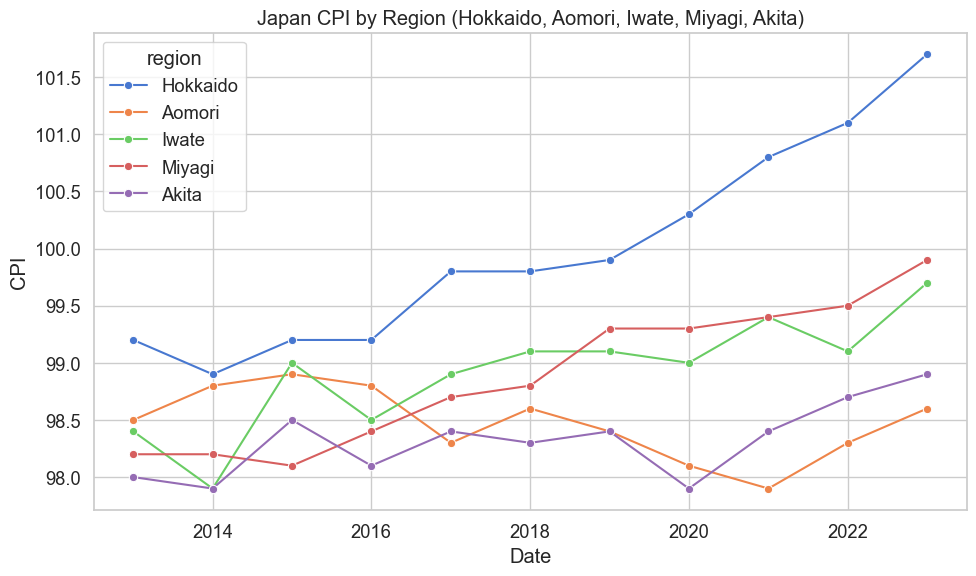

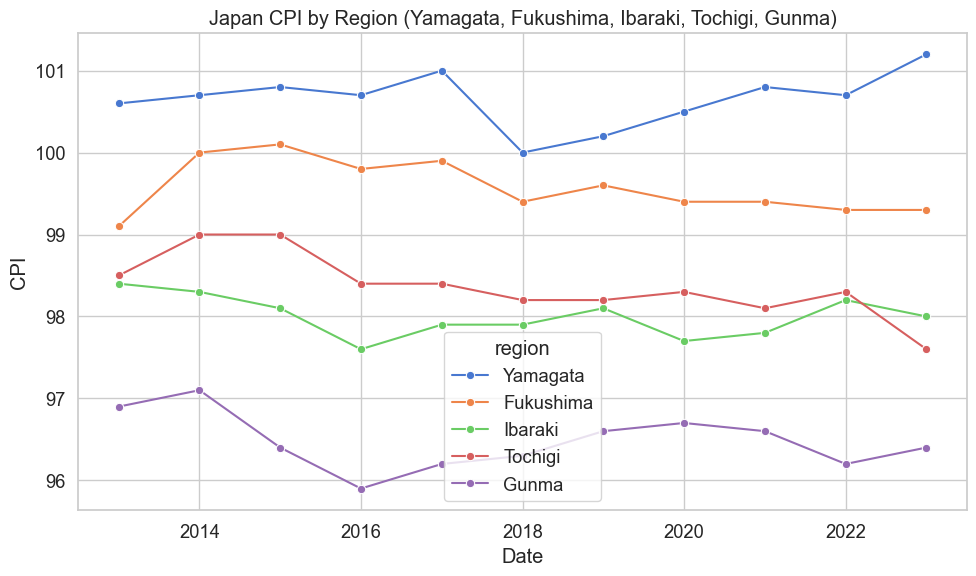

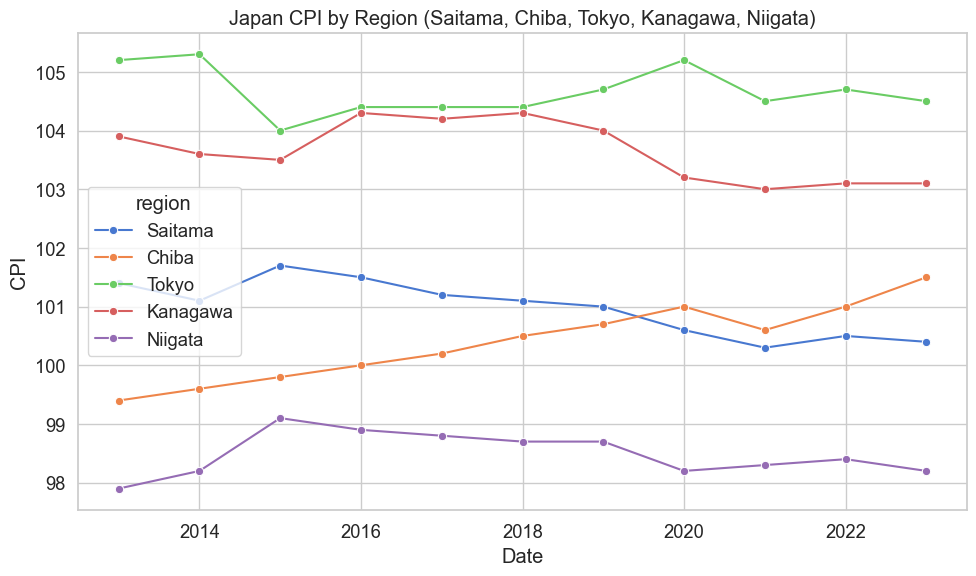

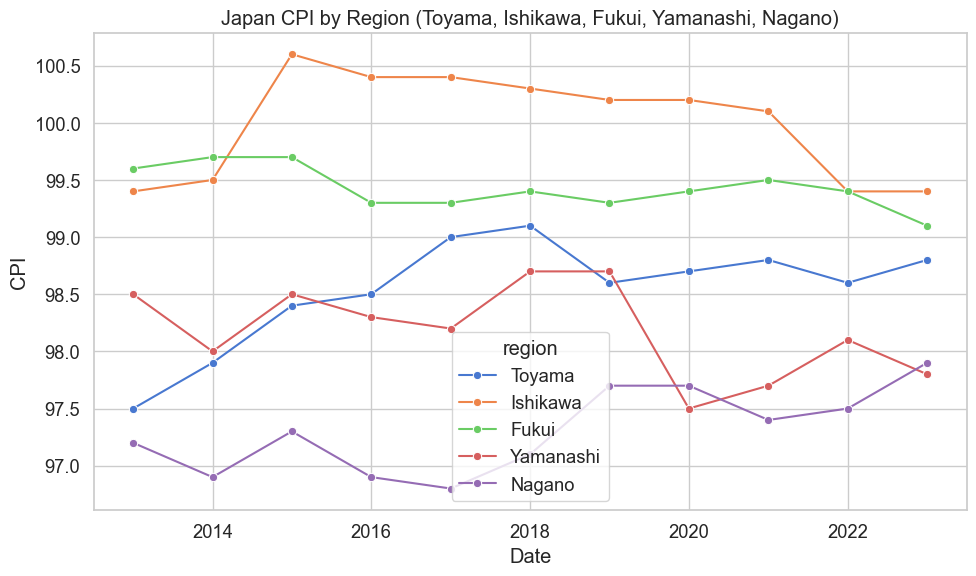

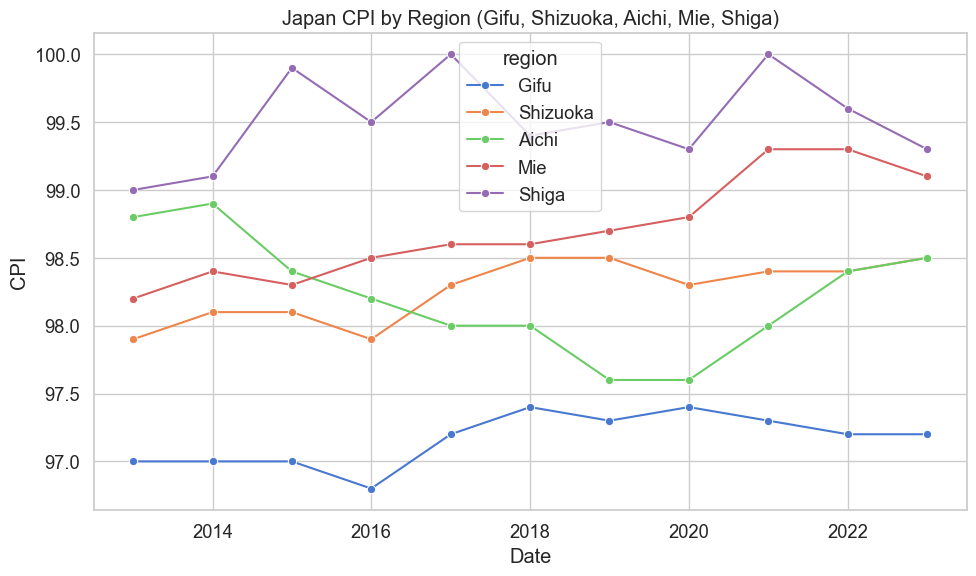

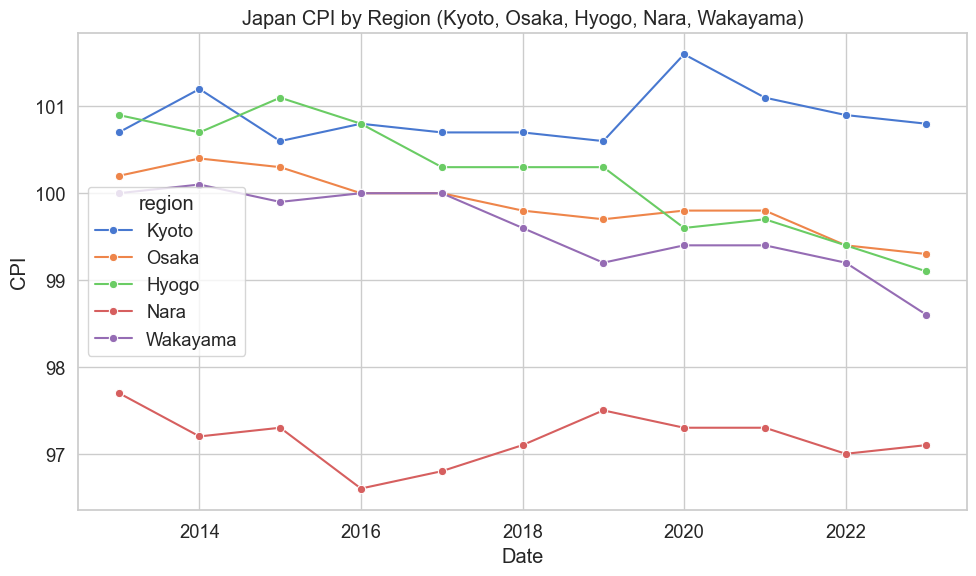

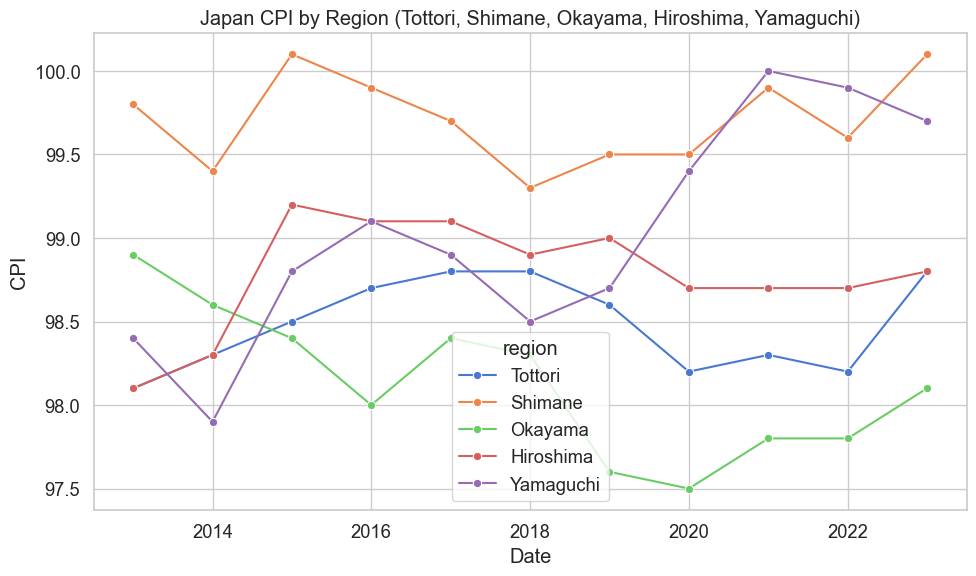

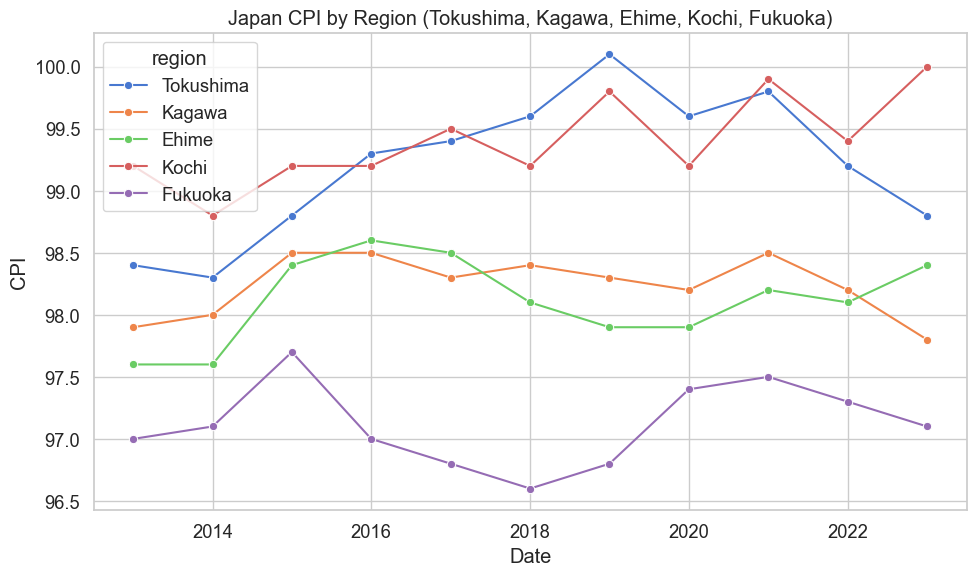

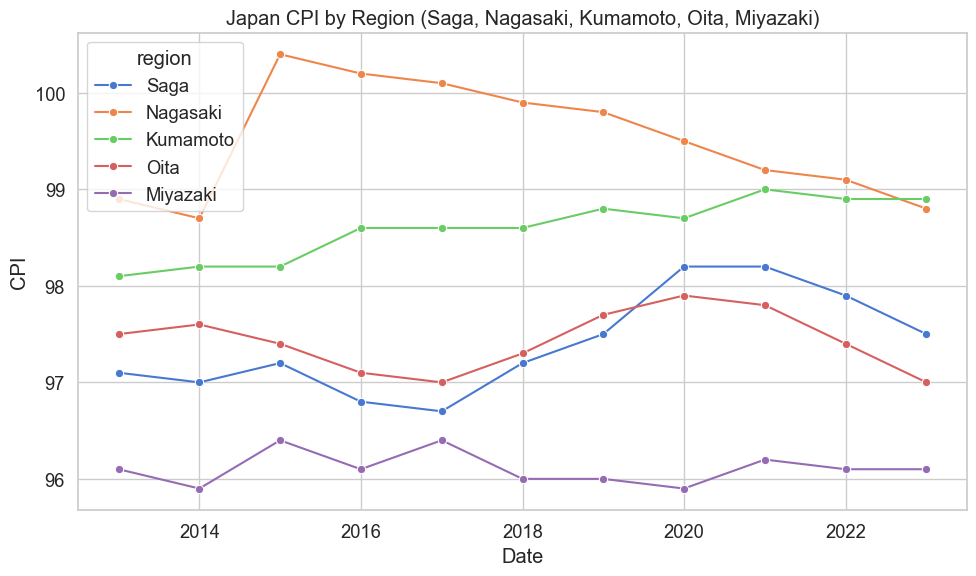

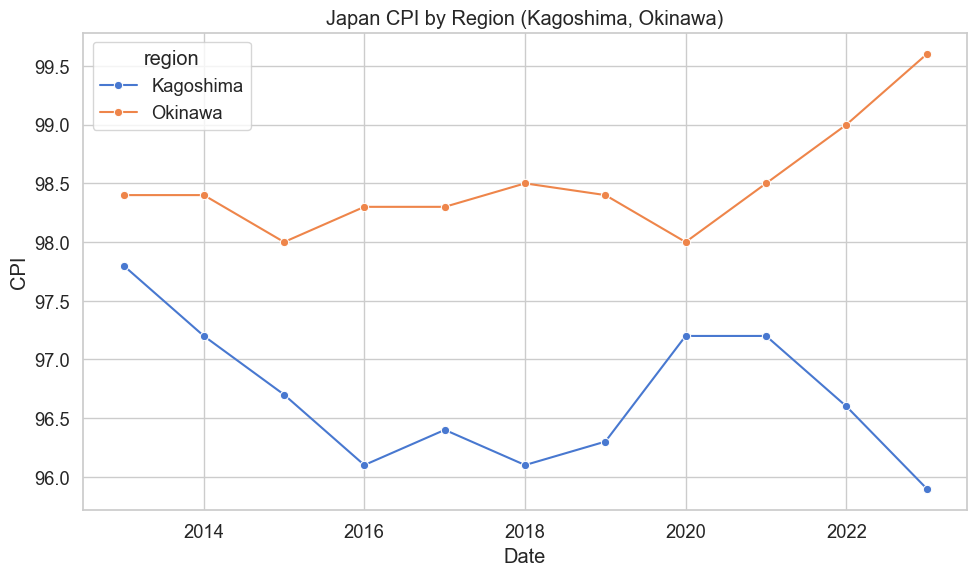

In [16]:
df_long = df.melt(id_vars=["Date"], var_name="region", value_name="CPI")

import math

regions = [col for col in df.columns if col not in ['Date']]
n = len(regions)
n_fig = math.ceil(n / 5)

plt.rcParams['font.family'] = 'MS Gothic'
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)

for i in range(n_fig):
    group = regions[i*5:(i+1)*5]
    df_long = df.melt(id_vars=["Date"], value_vars=group, var_name="region", value_name="CPI")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_long, x='Date', y='CPI', hue='region', marker='o')
    plt.title(f'Japan CPI by Region ({", ".join(group)})')
    plt.tight_layout()
    plt.show()

In [22]:
import plotly.express as px

# 都道府県→地方の辞書
pref_to_area = {
    'Hokkaido': 'Hokkaido',
    'Aomori': 'Tohoku', 'Iwate': 'Tohoku', 'Miyagi': 'Tohoku', 'Akita': 'Tohoku', 'Yamagata': 'Tohoku', 'Fukushima': 'Tohoku',
    'Ibaraki': 'Kanto', 'Tochigi': 'Kanto', 'Gunma': 'Kanto', 'Saitama': 'Kanto', 'Chiba': 'Kanto', 'Tokyo': 'Kanto', 'Kanagawa': 'Kanto',
    'Niigata': 'Chubu', 'Toyama': 'Chubu', 'Ishikawa': 'Chubu', 'Fukui': 'Chubu', 'Yamanashi': 'Chubu', 'Nagano': 'Chubu', 'Gifu': 'Chubu', 'Shizuoka': 'Chubu', 'Aichi': 'Chubu',
    'Mie': 'Kinki', 'Shiga': 'Kinki', 'Kyoto': 'Kinki', 'Osaka': 'Kinki', 'Hyogo': 'Kinki', 'Nara': 'Kinki', 'Wakayama': 'Kinki',
    'Tottori': 'Chugoku', 'Shimane': 'Chugoku', 'Okayama': 'Chugoku', 'Hiroshima': 'Chugoku', 'Yamaguchi': 'Chugoku',
    'Tokushima': 'Shikoku', 'Kagawa': 'Shikoku', 'Ehime': 'Shikoku', 'Kochi': 'Shikoku',
    'Fukuoka': 'Kyushu', 'Saga': 'Kyushu', 'Nagasaki': 'Kyushu', 'Kumamoto': 'Kyushu', 'Oita': 'Kyushu', 'Miyazaki': 'Kyushu', 'Kagoshima': 'Kyushu', 'Okinawa': 'Kyushu'
}

# 地方名カラムを追加
df_long['area'] = df_long['region'].map(pref_to_area)

# 地方ごとに色分けして都道府県ごとに線を描画
fig = px.line(
    df_long,
    x="Date",
    y="CPI",
    color="area",         # 地方で色分け
    line_group="region",  # 都道府県ごとに線
    markers=True,
    title="Japan CPI by Region (Colored by Area)"
)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="CPI",
    legend_title="Area"
)
fig.show()